In [2]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix 
import seaborn as sn

In [3]:
Data = pd.read_csv("Weather (1).csv")
df = pd.DataFrame(Data)
df

,MinTemp,MaxTemp,Evaporation,avg Wind Dir,avg WindSpeed,Humidity,Pressure,No.of Clouds,Weather,max_wind_direction,max_wind_speed,min_wind_direction,min_wind_speed
0,8.0,24.3,3.4,SW,6,68,1019.7,7,Sunny,106,1.6,85,1.0
1,14.0,26.9,4.4,E,4,80,1012.4,5,Rainfall,215,1.5,43,0.2
2,13.7,23.4,5.8,N,6,82,1009.5,8,Rainfall,143,1.2,324,0.3
3,13.3,15.5,7.2,WNW,30,62,1005.5,2,Rainfall,112,1.6,12,0.7
4,7.6,16.1,5.6,SSE,20,68,1018.3,7,Rainfall,260,1.0,100,0.1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
361,9.0,30.7,7.6,SSE,7,38,1016.1,1,Sunny,199,2.1,189,1.5
362,7.1,28.4,11.6,NNW,2,45,1020.0,0,Sunny,203,2.3,189,1.8
363,12.5,19.9,8.4,ENE,11,63,1024.0,3,Sunny,213,2.8,186,1.9
364,12.5,26.9,5.0,SSW,6,69,1021.0,6,Sunny,196,2.5,186,1.8


In [26]:
Data.Weather

0      1
1      0
2      0
3      0
4      0
      ..
361    1
362    1
363    1
364    1
365    1
Name: Weather, Length: 366, dtype: int32

In [4]:
df["avg Wind"] = df["avg Wind Dir"].astype('category')
df["Weather"] = df["Weather"].astype('category')

In [5]:
le = LabelEncoder()
df['avg Wind Dir'] = le.fit_transform(df['avg Wind Dir'])
df['Weather'] = le.fit_transform(df['Weather'])
df = df.iloc[:, 0:13]
df

,MinTemp,MaxTemp,Evaporation,avg Wind Dir,avg WindSpeed,Humidity,Pressure,No.of Clouds,Weather,max_wind_direction,max_wind_speed,min_wind_direction,min_wind_speed
0,8.0,24.3,3.4,12,6,68,1019.7,7,1,106,1.6,85,1.0
1,14.0,26.9,4.4,0,4,80,1012.4,5,0,215,1.5,43,0.2
2,13.7,23.4,5.8,3,6,82,1009.5,8,0,143,1.2,324,0.3
3,13.3,15.5,7.2,14,30,62,1005.5,2,0,112,1.6,12,0.7
4,7.6,16.1,5.6,10,20,68,1018.3,7,0,260,1.0,100,0.1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
361,9.0,30.7,7.6,10,7,38,1016.1,1,1,199,2.1,189,1.5
362,7.1,28.4,11.6,6,2,45,1020.0,0,1,203,2.3,189,1.8
363,12.5,19.9,8.4,1,11,63,1024.0,3,1,213,2.8,186,1.9
364,12.5,26.9,5.0,11,6,69,1021.0,6,1,196,2.5,186,1.8


<AxesSubplot:xlabel='Weather', ylabel='count'>

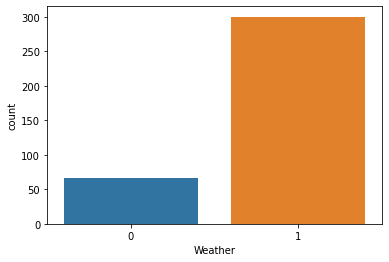

In [6]:
import seaborn as sn
sn.countplot(x='Weather',data=df)

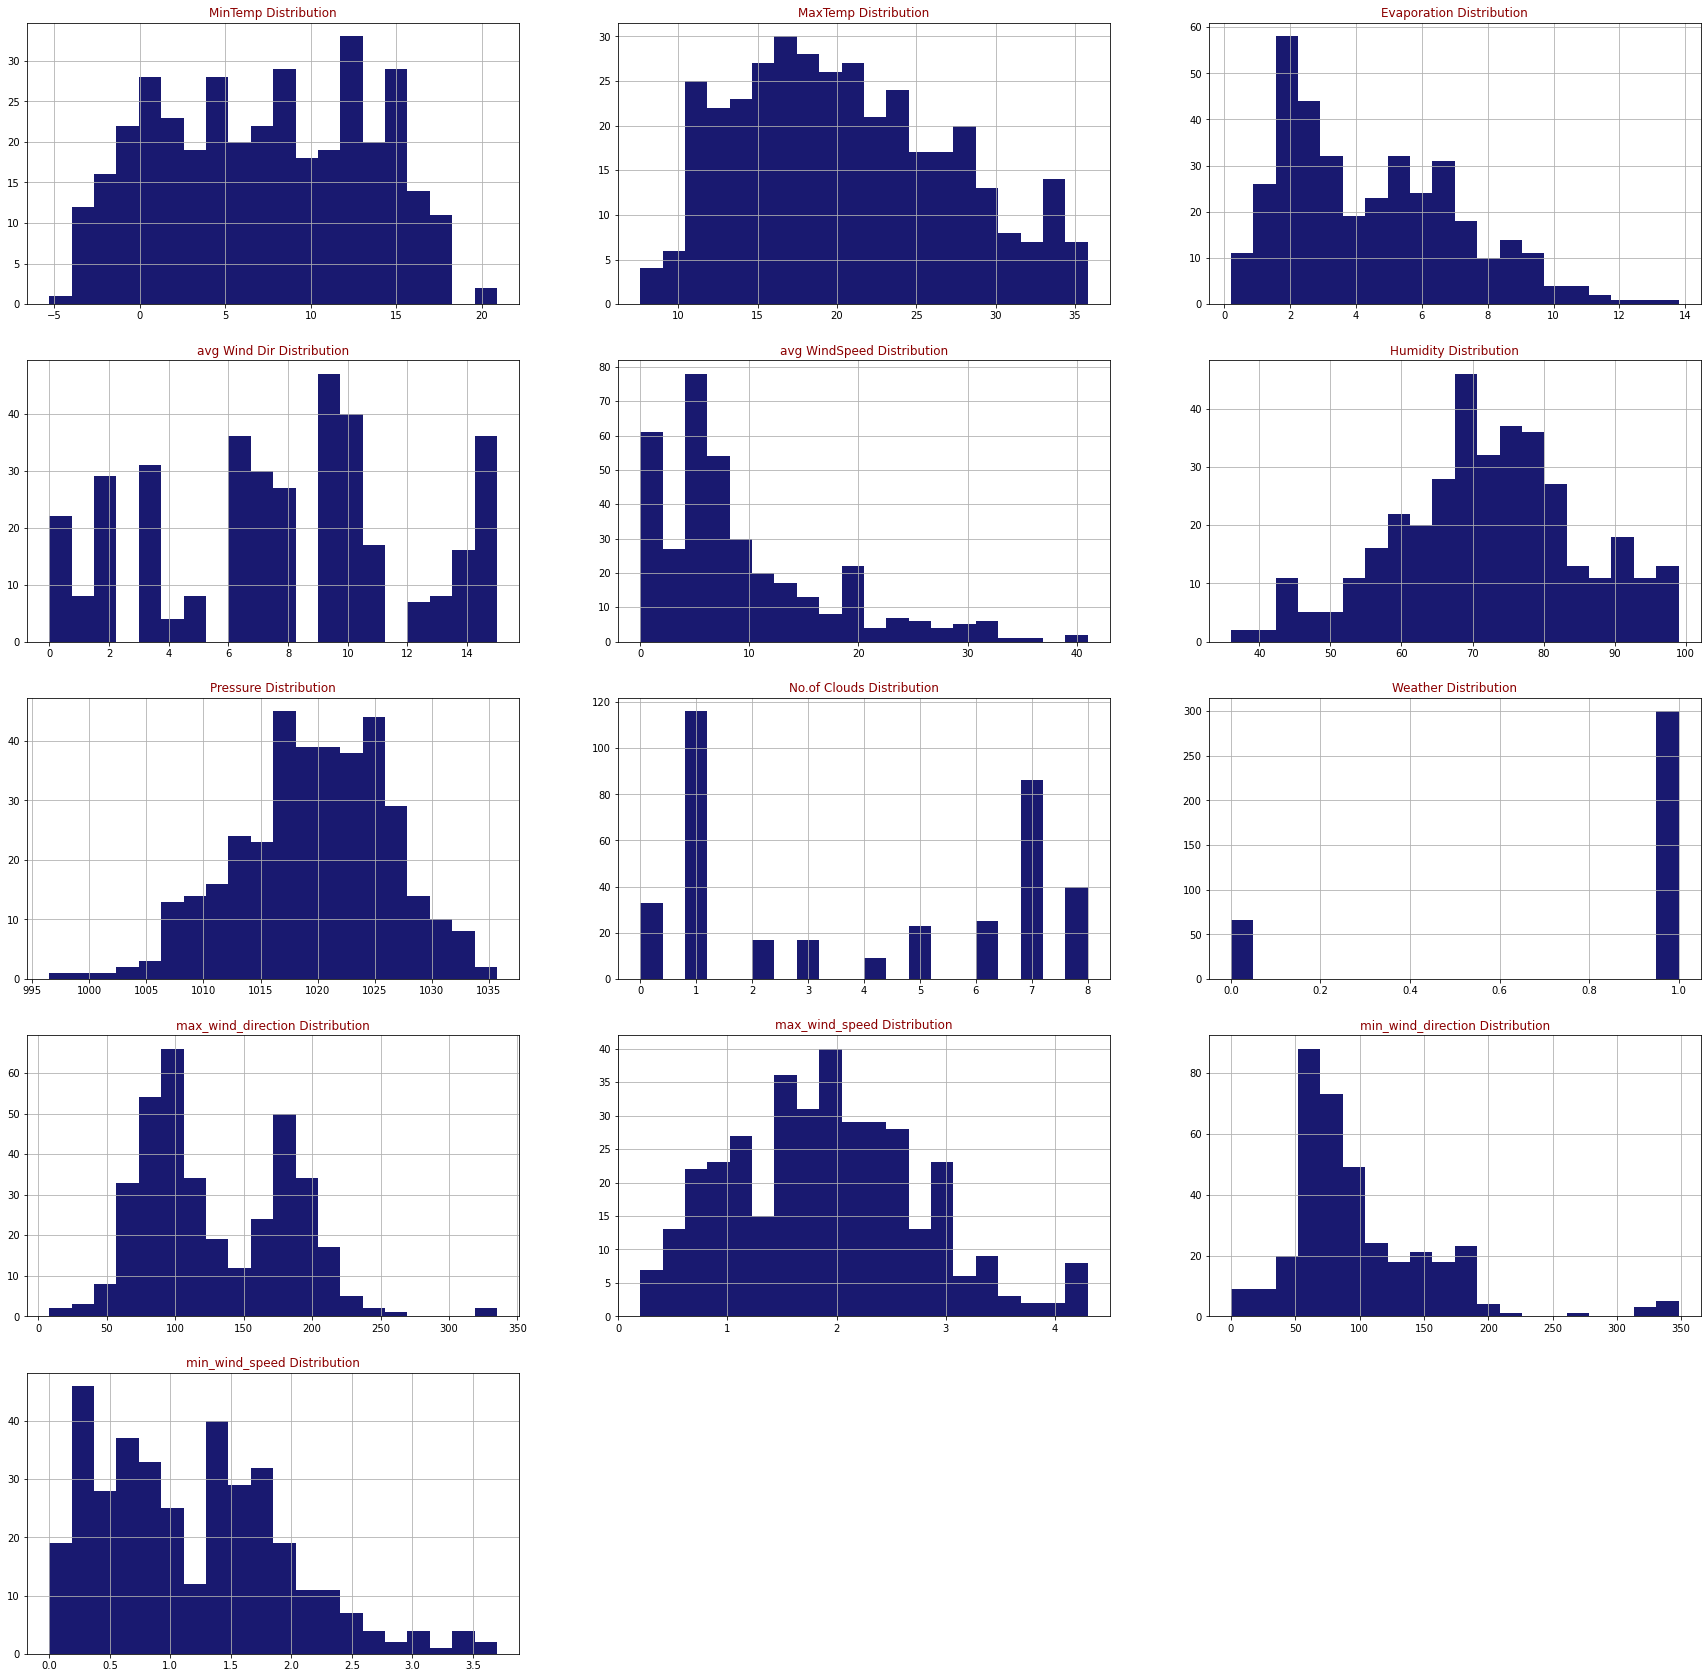

In [7]:
def draw_histograms(dataframe, features, rows, cols):
    fig=plt.figure(figsize=(30,30))
    for i, feature in enumerate(features):
        ax=fig.add_subplot(rows,cols,i+1)
        dataframe[feature].hist(bins=20,facecolor='midnightblue')
        ax.set_title(feature+" Distribution",color='DarkRed')
        
 
    plt.show()
draw_histograms(df,df.columns,5,3)

In [8]:
df.corr()

,MinTemp,MaxTemp,Evaporation,avg Wind Dir,avg WindSpeed,Humidity,Pressure,No.of Clouds,Weather,max_wind_direction,max_wind_speed,min_wind_direction,min_wind_speed
MinTemp,1.000000,0.752471,0.649930,-0.241647,0.128864,-0.207897,-0.501707,0.215776,-0.230733,-0.254207,0.390049,-0.233002,0.350939
MaxTemp,0.752471,1.000000,0.690026,-0.175317,-0.213376,-0.359602,-0.290883,-0.175730,0.065860,-0.148022,0.309841,-0.146770,0.246687
Evaporation,0.649930,0.690026,1.000000,-0.233911,0.071626,-0.519587,-0.381906,-0.106007,0.032638,-0.198255,0.382787,-0.113031,0.349563
avg Wind Dir,-0.241647,-0.175317,-0.233911,1.000000,-0.112536,0.103775,0.110223,-0.036196,0.031642,0.069784,-0.130924,-0.032370,-0.132673
avg WindSpeed,0.128864,-0.213376,0.071626,-0.112536,1.000000,-0.273148,-0.349824,0.101873,-0.259601,-0.123615,0.044678,0.004762,0.109459
Humidity,-0.207897,-0.359602,-0.519587,0.103775,-0.273148,1.000000,0.135727,0.392842,-0.203495,0.138221,-0.233357,0.023218,-0.276881
Pressure,-0.501707,-0.290883,-0.381906,0.110223,-0.349824,0.135727,1.000000,-0.157553,0.352186,0.226611,-0.240851,0.161361,-0.261160
No.of Clouds,0.215776,-0.175730,-0.106007,-0.036196,0.101873,0.392842,-0.157553,1.000000,-0.214767,-0.068535,0.010310,-0.089080,0.046561
Weather,-0.230733,0.065860,0.032638,0.031642,-0.259601,-0.203495,0.352186,-0.214767,1.000000,0.029835,0.024995,-0.006948,0.013305
max_wind_direction,-0.254207,-0.148022,-0.198255,0.069784,-0.123615,0.138221,0.226611,-0.068535,0.029835,1.000000,-0.325236,0.552981,-0.444618


<AxesSubplot:>

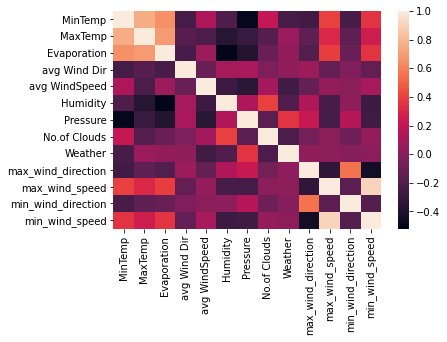

In [9]:
sn.heatmap(df.corr())


The decision tree for the Weather classification dataset is: 


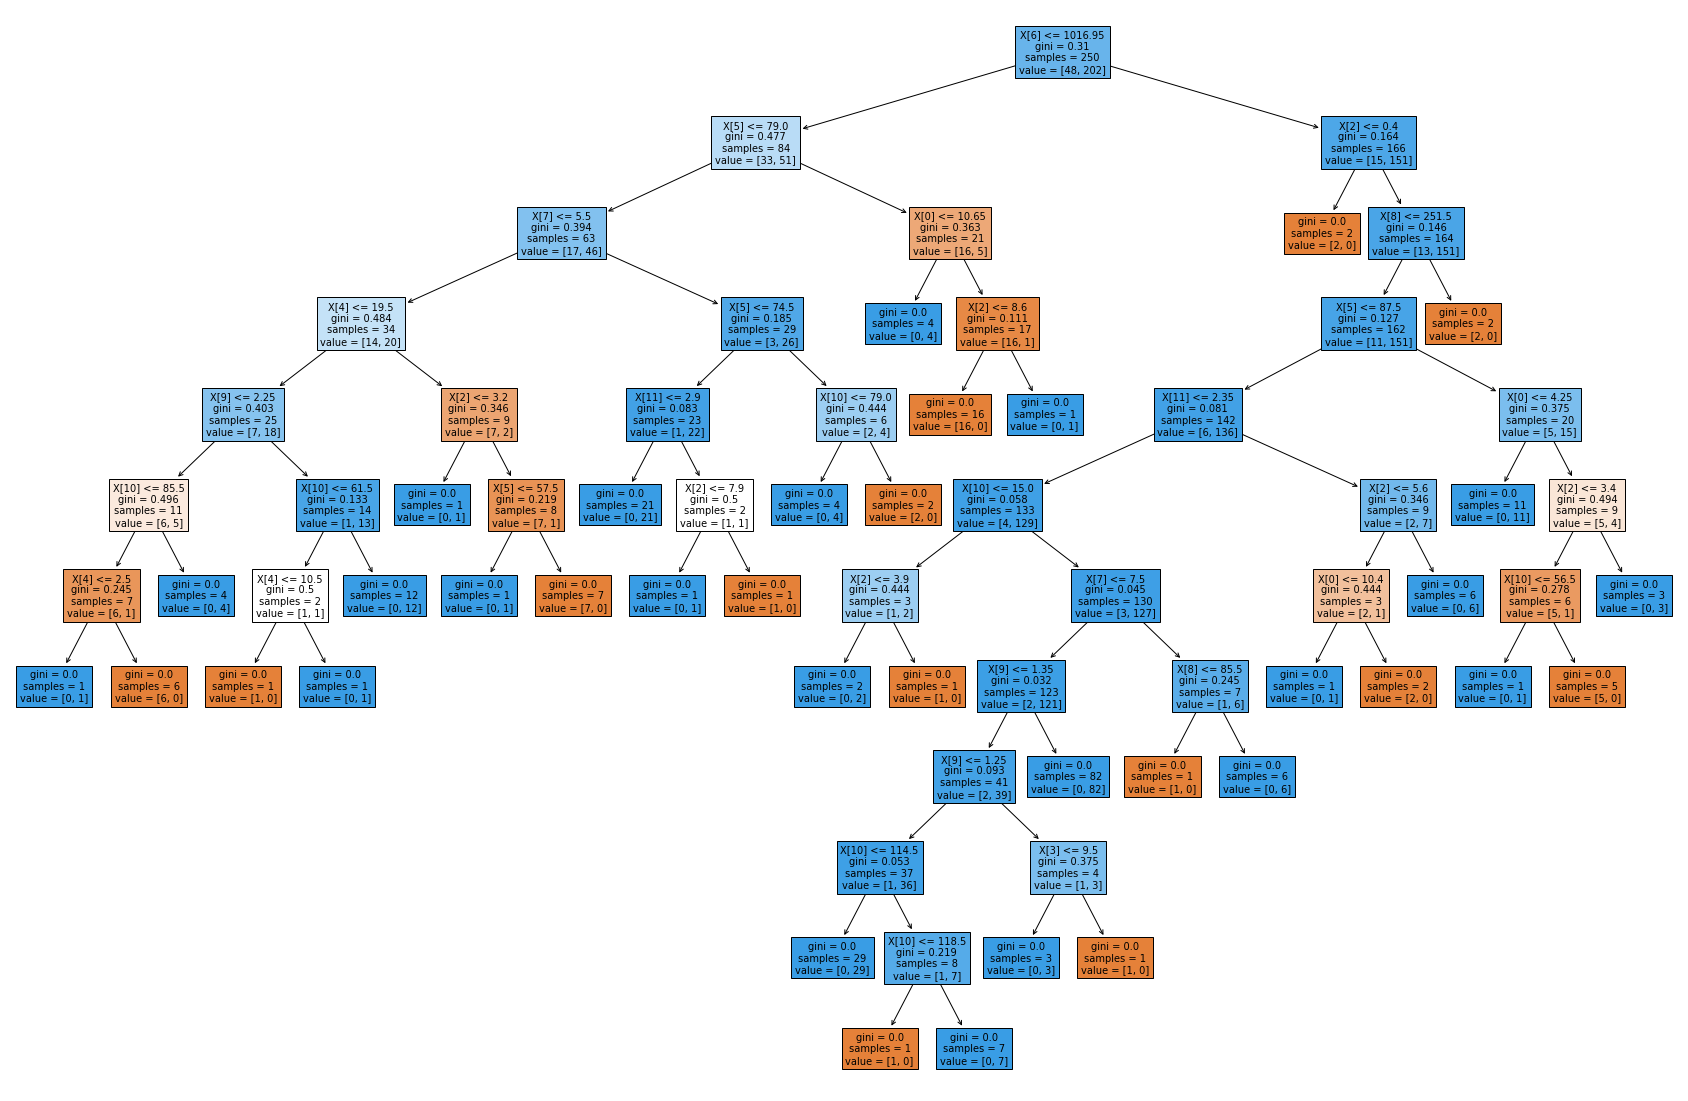

In [28]:
x = df.drop(['Weather'], axis = 1)
y = df['Weather']

x_train = x.iloc[0:250, :]
y_train = y.iloc[0:250]
x_test = x.iloc[250:365, :]
y_test = y.iloc[250:365]
Decision_tree = tree.DecisionTreeClassifier()
model = Decision_tree.fit(x_train, y_train)

plt.figure(figsize = (30,20))
# Plot the decision tree, showing the decisive values and the improvements in Gini impurity along the way.
tree.plot_tree(model, filled=True)
# Display the tree plot figure.
print()
print("The decision tree for the Weather classification dataset is: ")
plt.show()

In [30]:
y_pred = model.predict(x_test)
accuracy = accuracy_score(y_test, y_pred)
accuracy_percentage = 100 * accuracy
print('Accuracy:', accuracy_percentage)

print(classification_report(y_test, y_pred))

Accuracy: 80.8695652173913
              precision    recall  f1-score   support

           0       0.33      0.22      0.27        18
           1       0.86      0.92      0.89        97

    accuracy                           0.81       115
   macro avg       0.60      0.57      0.58       115
weighted avg       0.78      0.81      0.79       115



<AxesSubplot:>

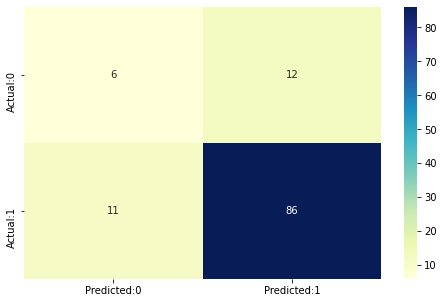

In [14]:
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test,y_pred)
conf_matrix=pd.DataFrame(data=cm,columns=['Predicted:0','Predicted:1'],index=['Actual:0','Actual:1'])
plt.figure(figsize = (8,5))
sn.heatmap(conf_matrix, annot=True,fmt='d',cmap="YlGnBu")

### Random Forest Classifier

Accuracy:  87.82608695652175
Classification Report
              precision    recall  f1-score   support

           0       0.75      0.33      0.46        18
           1       0.89      0.98      0.93        97

    accuracy                           0.88       115
   macro avg       0.82      0.66      0.70       115
weighted avg       0.87      0.88      0.86       115



<AxesSubplot:>

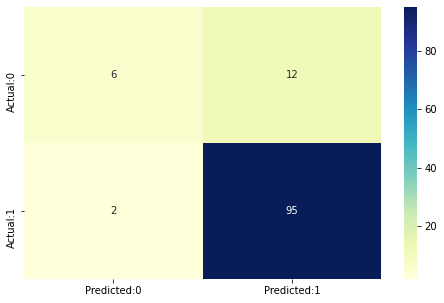

In [20]:
from sklearn.ensemble import RandomForestClassifier
RFC = RandomForestClassifier()
model  = RFC.fit(x_train, y_train)

y_pred = model.predict(x_test)

accuracy = accuracy_score(y_test, y_pred)
accuracy_percentage = 100 * accuracy
print('Accuracy: ',accuracy_percentage)

print("Classification Report")
print(classification_report(y_test, y_pred))

from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test,y_pred)
conf_matrix=pd.DataFrame(data=cm,columns=['Predicted:0','Predicted:1'],index=['Actual:0','Actual:1'])
plt.figure(figsize = (8,5))
sn.heatmap(conf_matrix, annot=True,fmt='d',cmap="YlGnBu")